# The null model

本课程前置需要装的包：

In [ ]:
require(s20x)
require(bootstrap)

## Revisiting the null model 回顾零模型

本节同样以 Stats20x 的学生考试成绩为例：

In [ ]:
Stats20x.df <- read.table("../data/STATS20x.txt", header = TRUE, sep = "\t")

零模型就是把线性模型中的斜率去掉，或斜率指定常数，从而排除其影响单独分析截距。本节将重点讲述零模型的最大作用：T检验。

> [一文详解t检验 - 知乎](https://zhuanlan.zhihu.com/p/138711532)
> 
> t检验（t test）又称学生t检验（Student t-test）可以说是统计推断中非常常见的一种检验方法，用于统计量服从正态分布，但方差未知的情况。
> 
> t检验的前提是要求样本服从正态分布或近似正态分布，不然可以利用一些变换（取对数、开根号、倒数等等）试图将其转化为服从正态分布是数据，如若还是不满足正态分布，只能利用非参数检验方法。不过当样本量大于30的时候，可以认为数据近似正态分布。
> 
> t检验最常见的四个用途：
> 
> - 单样本均值检验（One-sample t-test）
>   用于检验 “总体方差未知、正态数据或近似正态的” 单样本的均值，是否与已知的总体均值相等。
> - 两独立样本均值检验（Independent two-sample t-test）
>   用于检验两对 “独立的，正态数据或近似正态的” 样本的均值是否相等，这里可根据总体方差是否相等分类讨论。
> - 配对样本均值检验（Dependent t-test for paired samples）
>   用于检验一对配对样本的均值的差，是否等于某一个值
> - 回归系数的显著性检验（t-test for regression coefficient significance）
>   用于检验回归模型的解释变量，对被解释变量是否有显著影响

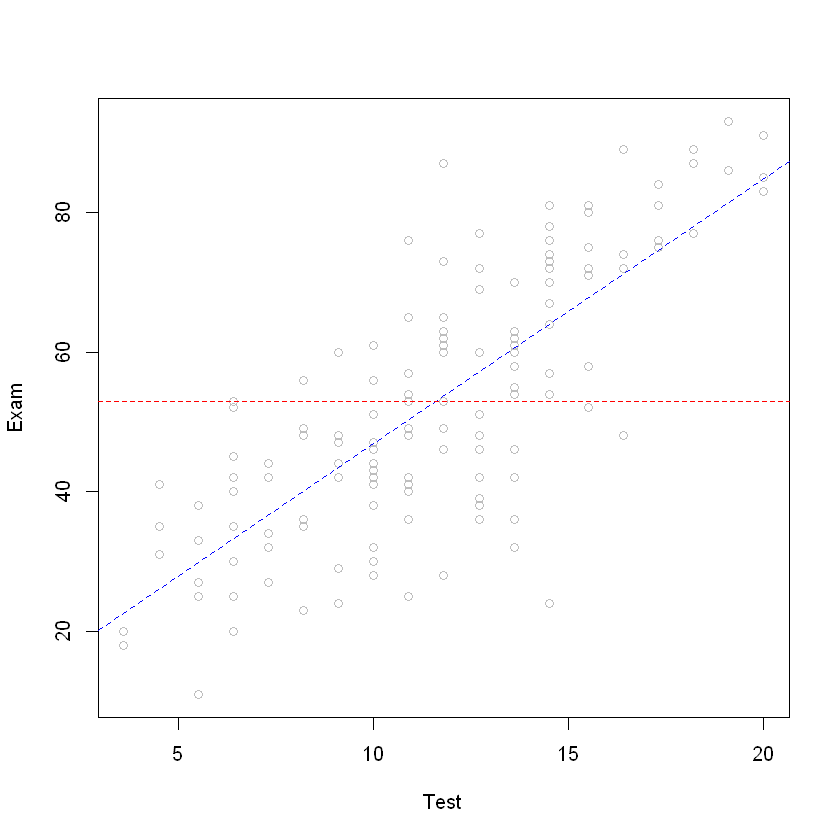

In [ ]:
# 建立回归模型
examtest.fit <- lm(Exam ~ Test, data = Stats20x.df)
examtest.fit2 <- lm(Exam ~ 1, data = Stats20x.df)

# 绘图
plot(Exam ~ Test, data = Stats20x.df, col = "grey")
abline(examtest.fit, col = "blue", lty = 2)
abline(examtest.fit2, col = "red", lty = 2)

推断总体均值：

To save some typing we’ll let y be the vector Stats20x.df$Exam of exam scores.

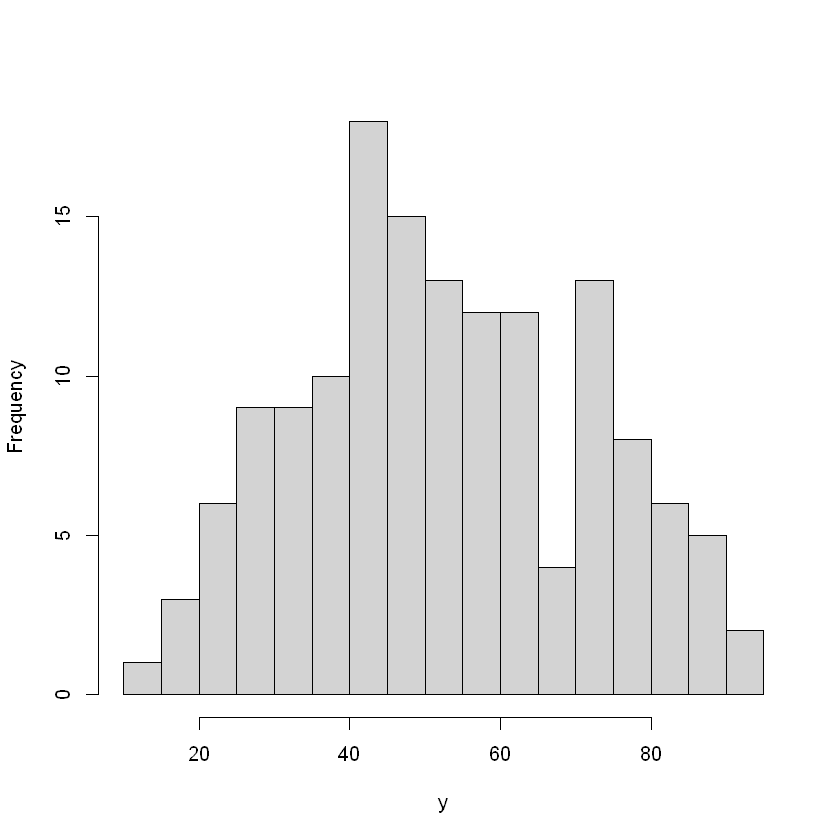

In [ ]:
y=Stats20x.df$Exam
hist(y,breaks=20,main="") #Use main to suppress plot title

继续使用零模型做线性回归，使其更关注于y值的置信关系与p检验。

In [ ]:
null.fit = lm(y ~ 1)
# Only give coefficients from summary 将系数板块单独提取出做展示
coef(summary(null.fit))
# 获得该零模型的对应置信区间
confint(null.fit)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),52.87671,1.545802,34.20666,2.632011e-71


,2.5 %,97.5 %
(Intercept),49.8215,55.93193


Conclusion:

- The near zero $Pr(>|t|)$ p-value totally rejects(拒绝) the null hypothesis(零假设) that $H0 : µ ≡ β0 = 0$.
- The 95% confidence interval(置信区间) for $µ$ is 49.82 to 55.93.

## Revisiting the t-test

$$
T = \frac
{\bar{y} - \mu}
{\frac{s}{\sqrt n}} \sim t_{n-1}
$$

其中 $\bar{y}$ 为样本均值，$s$ 为样本标准差。

$$
s=\sqrt{\frac{1}{n-1}\sum_{i=1}^n(X_i-\bar X)^2}
$$

In [ ]:
n=length(y) #146 students
tstat=(mean(y)-0)/(sd(y)/sqrt(n)) 
tstat

[1] 34.20666

In [ ]:
## t-multiplier
tmult = qt(1-.05/2, df=n-1)
## We want the upper 97.5% (or 1-.05/2) bound of the CI
## NOTE: mean = sample mean; sd = standard deviation; sqrt = square root
mean(y) - tmult * sd(y) / sqrt(n)

## Upper bound of CI 置信区间上限
mean(y) + tmult*sd(y)/sqrt(n)
## Or if we want both the lower and upper bounds of the CI in one statement
## 置信区间下限
mean(y) + c(-1,1)*tmult*sd(y)/sqrt(n)

[1] 49.8215

[1] 55.93193

[1] 49.82150 55.93193

零模型就是单样本T检验。

手动随机抽样检验我们的结果：

In [ ]:
## Resampling the exam marks, N times with replacement:
N <- 10000 # The number of bootstrap resamples we want
# The new sample means are stored in ybar
ybar <- rep(NA, N) ## A vector of length N to store our resampled means

## A loop - allows us to do something N (10,000) times
for (i in 1:N) {
    ## Take the average of this sample (below) from a sample of size n = 146 from y - with replacement
    ybar[i] <- mean(sample(y, n, replace = T))
}
mean(ybar)

[1] 52.89343

In [ ]:
library(bootstrap)
ybar = bootstrap(Stats20x.df$Exam, 10000, mean)$thetastar
mean(ybar)

[1] 52.88008

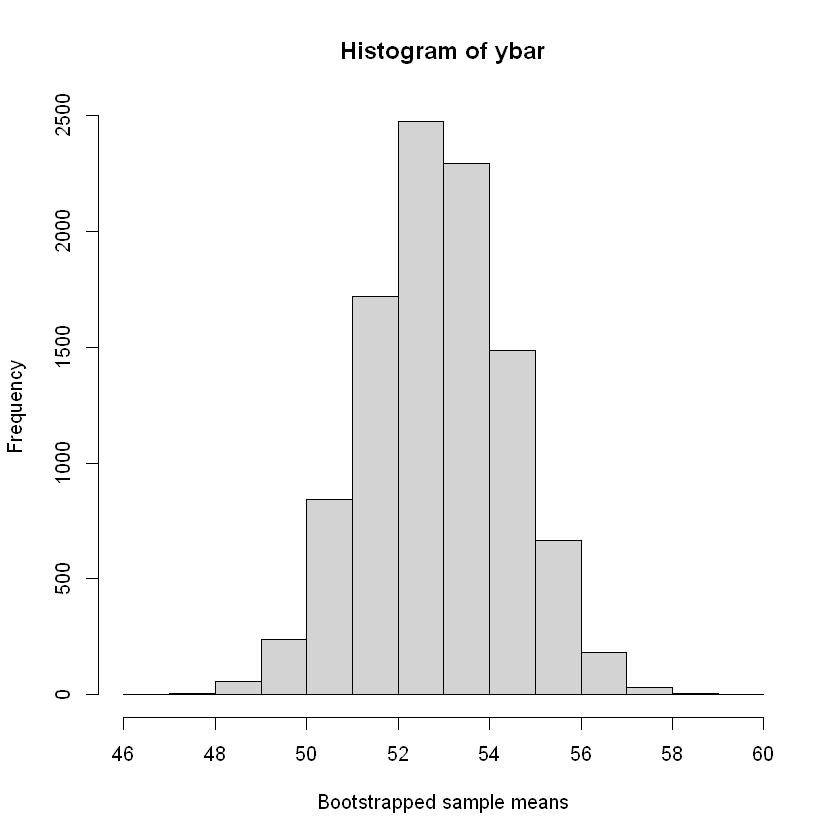

In [ ]:
## Histogram of these 10,000 bootstrap means 
hist(ybar,xlab="Bootstrapped sample means")

## The paired t-test

For a meaningful comparison, We will need to make them have the same scale, so we multiply the test mark by 5 so that it is also out of 100.


In [ ]:
Stats20x.df$Test2 = 5 * Stats20x.df$Test 
## Check that it worked
Stats20x.df[1:3, c("Exam","Test","Test2")]

,Exam,Test,Test2
,<int>,<dbl>,<dbl>
1,42,9.1,45.5
2,58,13.6,68.0
3,81,14.5,72.5


In [ ]:
Stats20x.df$Diff = Stats20x.df$Test2 - Stats20x.df$Exam 
## Check the first 5 measurements
Stats20x.df[1:5, c("Test2","Exam","Diff")]

,Test2,Exam,Diff
,<dbl>,<int>,<dbl>
1,45.5,42,3.5
2,68.0,58,10.0
3,72.5,81,-8.5
4,95.5,86,9.5
5,41.0,35,6.0


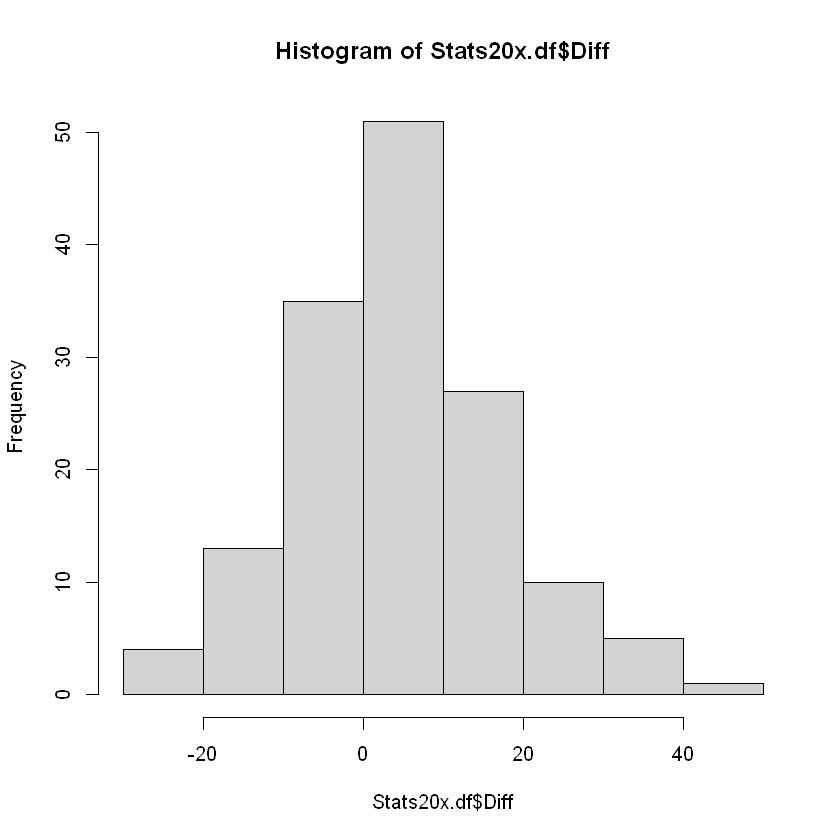

In [ ]:
hist(Stats20x.df$Diff)